In [1]:
import sys
sys.path.insert(0, '/gap-junction-segmentation/code/src')
from pathlib import Path
import os
import re
import cv2
import matplotlib.pyplot as plt
import random
import numpy as np
from cc3d import connected_components
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, jaccard_score, confusion_matrix
import torch
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from torch import nn
from torchmetrics.classification import (
    BinaryAccuracy,
    BinaryPrecision,
    BinaryRecall,
    BinaryF1Score,
    BinaryJaccardIndex
)
from tqdm import tqdm
from torchvision.transforms.functional import to_tensor
from scipy.ndimage import label

src_path = os.path.abspath(os.path.join(os.getcwd(), "..", "src"))
if src_path not in sys.path:
    sys.path.append(src_path)

#Custom libraries
from utils import * ##import everything
from models import TestDataset, UNet #import custom model and dataset
from entity_detection import GapJunctionEntityDetector

In [2]:
import sys
# Add parent directory to sys.path
parent_dir = '/home/tommytang111/gap-junction-segmentation/code/src'
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)


In [2]:
from torchvision.transforms import ToTensor
entity_detector = GapJunctionEntityDetector()
##Load in the image

gj_img = cv2.imread("/Users/kirby/Desktop/GJ_data/imgs/SEM_adult_image_export2_s200_part5.png", cv2.IMREAD_GRAYSCALE)
gt_img = cv2.imread("/Users/kirby/Desktop/GJ_data/gts/SEM_adult_image_export2_s200_part5_label.png", cv2.IMREAD_GRAYSCALE)
model = UNet(classes = 1, )  
model_path = "/Users/kirby/Desktop/GJ_models/best_models/unet_base_516imgs_sem_adult_8jkuifab.pt"

if gj_img is None:
    raise ValueError("gj img dne")

# Modify the single_image_inference function to include map_location
pred_img = single_image_inference_kirpa(image=gj_img, model_path=model_path, model=model)

pred_entities_positions, pred_num_entities =  GapJunctionEntityDetector.extract_entities_2d(entity_detector, img=pred_img)
gt_entities_positions, gt_num_entities =  GapJunctionEntityDetector.extract_entities_2d(entity_detector, img=gt_img)

print(f"Number of detected gap junction entities in inference image: {pred_num_entities}")
print(f"Number of detected gap junction entities in ground truth image: {gt_num_entities}")

print(pred_entities_positions)
print(gt_entities_positions)

Number of detected gap junction entities in inference image: 1
Number of detected gap junction entities in ground truth image: 1
[]
[]


[]
Precision: 0.0000
 Recall: 0.0000
 F1 Score: 0.0000


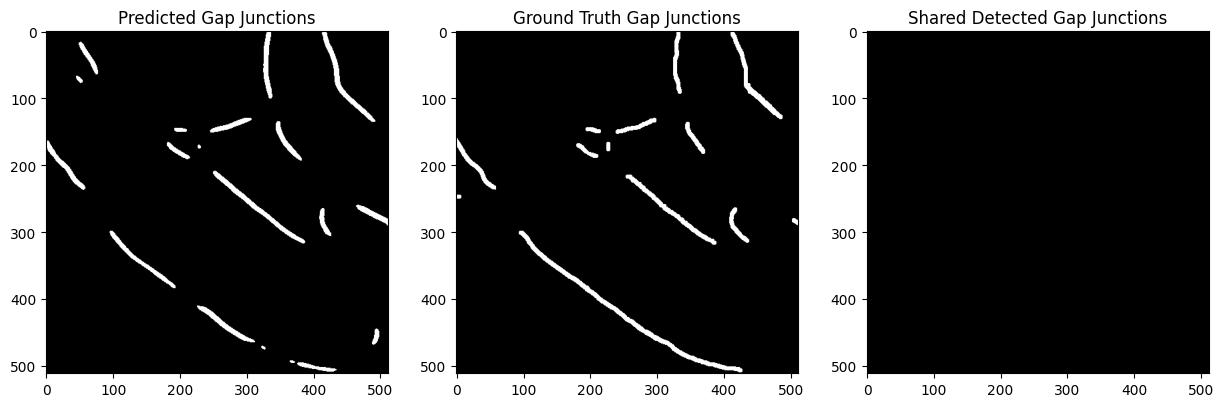

In [8]:
shared_entities, metrics = GapJunctionEntityDetector.entity_metrics_2d(entity_detector, pred_img=pred_img, gt_img=gt_img)
print(shared_entities)

precision = metrics['precision']
recall = metrics['recall']
f1_score = metrics['f1_score']

print(f"Precision: {precision:.4f}\n Recall: {recall:.4f}\n F1 Score: {f1_score:.4f}")
# Visualize the results
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title("Predicted Gap Junctions")
plt.imshow(pred_img, cmap='gray')
plt.subplot(1,3,2)
plt.title("Ground Truth Gap Junctions") 
plt.imshow(gt_img, cmap='gray')
plt.subplot(1,3,3)
plt.title("Shared Detected Gap Junctions")
shared_img = np.zeros_like(pred_img)
for pos in shared_entities:
    shared_img[pos[0], pos[1]] = 1
plt.imshow(shared_img, cmap='gray')